# Traffic sign classification/Recognition system

To implement a real time traffic sign classifier which identifies the traffic sign
Keras package is used to implement CNN model.
Dataset used : German traffic signs detection dataset(https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign)
The GTSRB dataset consists of 43 traffic sign classes and nearly 50,000 images.

# Import libraries

In [118]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow  
from PIL import Image 
import os 
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout,BatchNormalization

In [165]:
data = []
labels = []
classes = 43 
current_path = os.getcwd()

# Plot Image

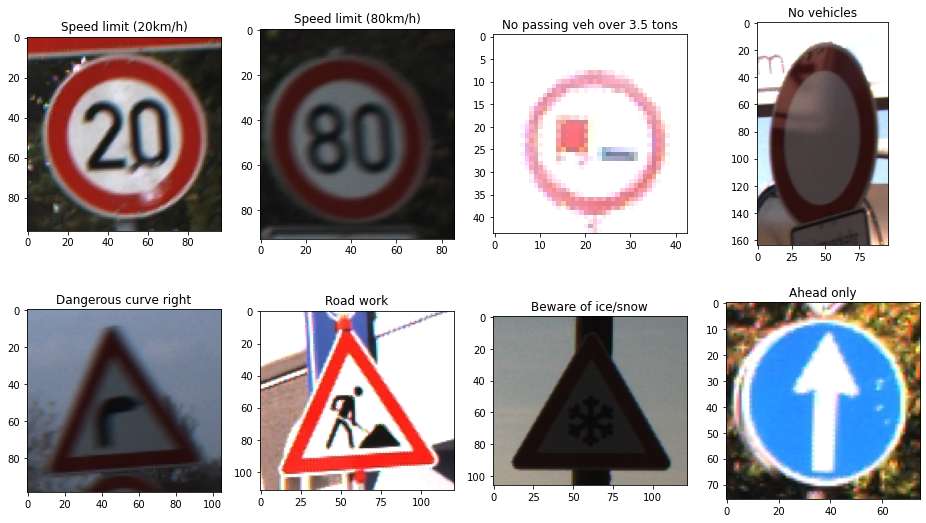

In [206]:
plt.figure(figsize=(16,9))
plt.subplot(2,4,1)
path = current_path+"\\train\\0\\00000_00000_00026.png"
img = Image.open(path)
plt.title(classes_dict[0])
plt.imshow(img)

plt.subplot(2,4,2)
path = current_path+"\\train\\5\\00005_00004_00029.png"
img = Image.open(path)
plt.title(classes_dict[5])
plt.imshow(img)


plt.subplot(2,4,3)
path = current_path+"\\train\\10\\00010_00003_00023.png"
img = Image.open(path)
plt.title(classes_dict[10])
plt.imshow(img)


plt.subplot(2,4,4)
path = current_path+"\\train\\15\\00015_00001_00029.png"
img = Image.open(path)
plt.title(classes_dict[15])
plt.imshow(img)

plt.subplot(2,4,5)
path = current_path+"\\train\\20\\00020_00002_00029.png"
img = Image.open(path) 
plt.title(classes_dict[20])
plt.imshow(img)

plt.subplot(2,4,6)
path = current_path+"\\train\\25\\00025_00000_00029.png"
img = Image.open(path)
plt.title(classes_dict[25])
plt.imshow(img)

plt.subplot(2,4,7)
path = current_path+"\\train\\30\\00030_00000_00026.png"
img = Image.open(path) 
plt.title(classes_dict[30])
plt.imshow(img)

plt.subplot(2,4,8)
path = current_path+"\\train\\35\\00035_00000_00023.png"
img = Image.open(path) 
plt.title(classes_dict[35])
plt.imshow(img)




# Load images from 'train' folder

In [110]:
for i in range(classes):
    path = os.path.join(current_path, 'train', str(i))
    images = os.listdir(path)
    for a in images:
        try:
            img = Image.open(path+ '\\'+ a)
            img = img.resize((64,64))
            img = np.array(img)
            data.append(img)
            labels.append(i)
        except Exception as e:
            print(e)

        

# Convert image in to array

In [111]:
data = np.array(data)
labels = np.array(labels)

# Save arrays

In [112]:
np.save('data.npy',data)
np.save('target.npy',labels)

In [113]:
print(data.shape, labels.shape)

(39209, 64, 64, 3) (39209,)


# Extract training and testing data

In [114]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [115]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 64, 64, 3) (7842, 64, 64, 3) (31367,) (7842,)


In [116]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

# Build CNN model using Keras
 
### Model Architechture

#Add a Convnet of 32 filters and relu activation
#Add a Convnet of 32 filters and relu activation
#Add a MaxPool layer of (2,2)
#Add Dropout Regularization with rate= 0.25
#Add a Convnet of 64 filters and relu activation
#Add a Convnet of 64 filters and relu activation
#Add Dropout Regularization with rate= 0.25
#Add a Maxpool Layer of (2,2)
#Add a Dropout Regularization with rate = 0.5
#Flattening the Model
#Dense layer with relu activation 
#Final Softmax to categorize the data

In [119]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))

model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

# Compile the model

In [120]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model

In [121]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
981/981 [==============================] - 396s 400ms/step - loss: 2.0812 - accuracy: 0.5017 - val_loss: 0.2549 - val_accuracy: 0.9265
Epoch 2/10
981/981 [==============================] - 411s 419ms/step - loss: 0.3751 - accuracy: 0.8842 - val_loss: 0.0832 - val_accuracy: 0.9768
Epoch 3/10
981/981 [==============================] - 404s 412ms/step - loss: 0.2253 - accuracy: 0.9316 - val_loss: 0.0658 - val_accuracy: 0.9837
Epoch 4/10
981/981 [==============================] - 400s 408ms/step - loss: 0.1661 - accuracy: 0.9527 - val_loss: 0.0828 - val_accuracy: 0.9815
Epoch 5/10
981/981 [==============================] - 407s 415ms/step - loss: 0.1281 - accuracy: 0.9662 - val_loss: 0.0472 - val_accuracy: 0.9904
Epoch 6/10
981/981 [==============================] - 408s 416ms/step - loss: 0.1175 - accuracy: 0.9685 - val_loss: 0.0351 - val_accuracy: 0.9926
Epoch 7/10
981/981 [==============================] - 399s 406ms/step - loss: 0.0826 - accuracy: 0.9767 - val_loss: 0.0396 -

# plot accuracy and loss 

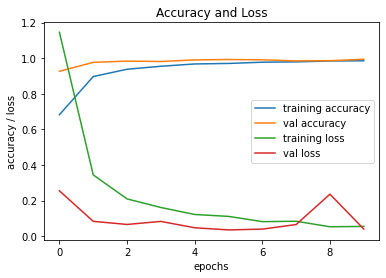

In [141]:

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.plot(history.history['loss'], label= 'training loss')
plt.plot(history.history['val_loss'], label= 'val loss')
plt.title('Accuracy and Loss')
plt.xlabel('epochs')
plt.ylabel('accuracy / loss')
plt.legend()
plt.show()


In [124]:
def testing(testcv):
    y_test = pd.read_csv(testcv)
    label = y_test['ClassId'].values
    imgs = y_test['Path'].values
    data = []
    for img in imgs:
        image = Image.open(img)
        image = image.resize((64,64))
        data.append(np.array(image))
    X_test = np.array(data)
    return X_test,label

In [125]:
X_test, label = testing('Test.csv')

# Predict for test_data

In [146]:
Y_pred = model.predict_classes(X_test)
Y_pred

array([16,  1, 38, ...,  5,  7, 10], dtype=int64)

# Accuracy with test_data

In [147]:
print(accuracy_score(label, Y_pred))

0.9756136183689628


In [148]:
def test_on_img(img):
    data = []
    image = Image.open(img)
    image = image.resize((64,64))
    data.append(np.array(image))
    X_test = np.array(data)
    Y_pred = model.predict_classes(X_test)
    return image, Y_pred

In [149]:
classes_dict = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

# Predict for images in test folder

Predicted traffic sign:  Road work 
ClassId :  25


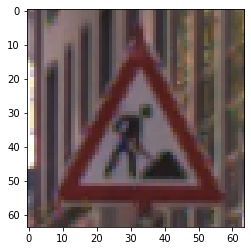

In [182]:
plot, prediction = test_on_img(r'Test\00212.png')
s = [str(i) for i in prediction]
a = int("".join(s))
print("Predicted traffic sign: ",classes_dict[a],"\nClassId : ",a)
plt.imshow(plot)
plt.show()